<a href="https://colab.research.google.com/github/eruru0411/git-test/blob/master/210225_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(121)
tf.random.set_seed(121)

def CHART_PLOT_HISTORY(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='acc')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_acc')
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],    label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],label='val_loss')
    plt.legend()
    plt.show()

In [ ]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) #(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
print(X_test, y_test[:2])

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [9 2]


In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


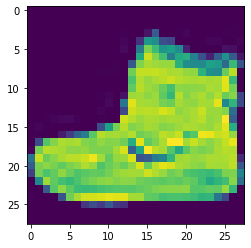

9


In [ ]:
plt.imshow(X_train[0]) #한장만 보겠음
plt.show()
print(y_train[0]) #첫번째 사진 정답 출력

In [ ]:
pd.value_counts(y_train)

#이미지에서의 데이터 증강법 : image augmentation 사용
#테스트 데이터는 증강 시키면 절대 안됨!

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [ ]:
#튜플로 저장
item = {
      0: 'T-shirt/top'
    , 1: 'Trouser'
    , 2: 'Pullover'
    , 3: 'Dress'
    , 4: 'Coat'
    , 5: 'Sandal'
    , 6: 'Shirt'
    , 7: 'Sneaker'
    , 8: 'Bag'
    , 9: 'Ankle boot'
}

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#(60000, 28, 28) (60000,)
X_train = X_train.reshape(X_train.shape[0], 28,28,1) / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1) / 255 

model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=40, kernel_size=(2,2), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_test,y_test), callbacks=[early_stop]) #공모전에서는 train으로 나눈파일 넣고 테스트는 predict에 따로 하기

Epoch 1/100
120/120 [==============================] - 22s 181ms/step - loss: 1.3457 - accuracy: 0.5641 - val_loss: 0.5766 - val_accuracy: 0.7851
Epoch 2/100
120/120 [==============================] - 22s 180ms/step - loss: 0.5310 - accuracy: 0.8028 - val_loss: 0.4855 - val_accuracy: 0.8276
Epoch 3/100
120/120 [==============================] - 22s 181ms/step - loss: 0.4674 - accuracy: 0.8280 - val_loss: 0.4525 - val_accuracy: 0.8394
Epoch 4/100
120/120 [==============================] - 22s 180ms/step - loss: 0.4229 - accuracy: 0.8479 - val_loss: 0.4357 - val_accuracy: 0.8434
Epoch 5/100
120/120 [==============================] - 22s 180ms/step - loss: 0.3830 - accuracy: 0.8609 - val_loss: 0.4090 - val_accuracy: 0.8508
Epoch 6/100
120/120 [==============================] - 22s 181ms/step - loss: 0.3701 - accuracy: 0.8661 - val_loss: 0.3995 - val_accuracy: 0.8554
Epoch 7/100
120/120 [==============================] - 22s 181ms/step - loss: 0.3523 - accuracy: 0.8731 - val_loss: 0.3707 -

In [ ]:
print('acc: {:.4f}, loss:{:.4f}'.format(model.evaluate(X_test, y_test)[1], model.evaluate(X_test, y_test)[0]))

313/313 [==============================] - 2s 6ms/step - loss: 0.2859 - accuracy: 0.9042
acc: 0.9042, loss:0.2859


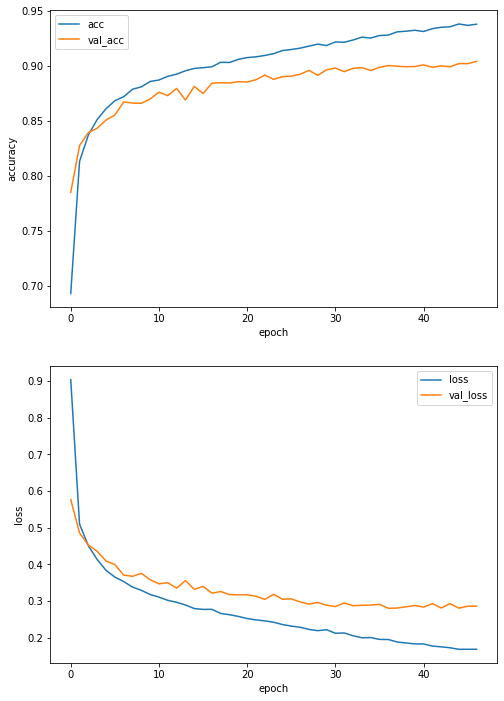

In [ ]:
CHART_PLOT_HISTORY(history)

In [ ]:
#onehotencoding 후 다시 돌리기
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/100
120/120 [==============================] - 22s 182ms/step - loss: 0.1661 - accuracy: 0.9392 - val_loss: 0.2926 - val_accuracy: 0.9035
Epoch 2/100
120/120 [==============================] - 22s 182ms/step - loss: 0.1568 - accuracy: 0.9418 - val_loss: 0.2861 - val_accuracy: 0.9020
Epoch 3/100
120/120 [==============================] - 22s 181ms/step - loss: 0.1573 - accuracy: 0.9425 - val_loss: 0.2933 - val_accuracy: 0.9013
Epoch 4/100
120/120 [==============================] - 22s 181ms/step - loss: 0.1509 - accuracy: 0.9445 - val_loss: 0.3065 - val_accuracy: 0.8952
Epoch 5/100
120/120 [==============================] - 22s 182ms/step - loss: 0.1518 - accuracy: 0.9445 - val_loss: 0.2887 - val_accuracy: 0.9025
Epoch 6/100
120/120 [==============================] - 22s 182ms/step - loss: 0.1458 - accuracy: 0.9462 - val_loss: 0.3012 - val_accuracy: 0.9018
Epoch 7/100
120/120 [==============================] - 22s 182ms/step - loss: 0.1457 - accuracy: 0.9458 - val_loss: 0.3092 -

In [ ]:
print('acc: {:.4f}, loss:{:.4f}'.format(model.evaluate(X_test, y_test)[1], model.evaluate(X_test, y_test)[0]))

313/313 [==============================] - 2s 6ms/step - loss: 0.2989 - accuracy: 0.9036
acc: 0.9036, loss:0.2989


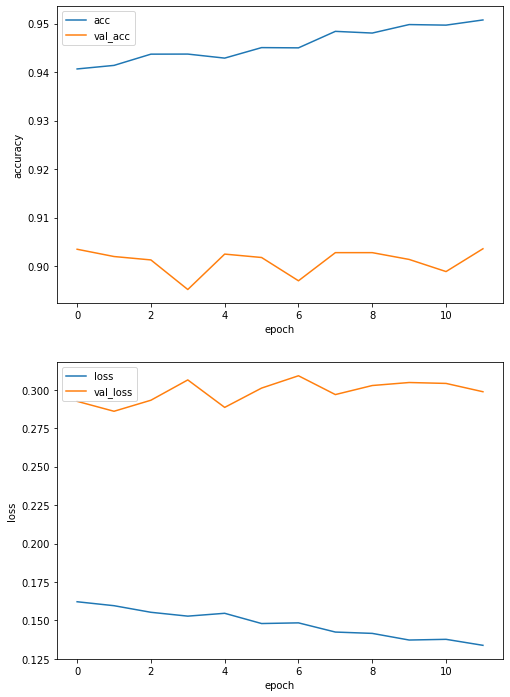

In [ ]:
CHART_PLOT_HISTORY(history)